<a href="https://colab.research.google.com/github/aniqohhana/Insurance_Prediction/blob/main/Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
# load csv into a dataframe
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [3]:
# get the number of rows and columns
df.shape

(1338, 7)

The dataset has 1338 records and 7 columns.

In [4]:
# view the first five rows of dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset consist categorical variables (smoker, sex, region) and numeric variables (age, BMI, children).

In [5]:
# examine the missing values in the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values in the dataset. 

In [6]:
# examine the duplicate row
duplicate_rows = df[df.duplicated()]
print("Duplicate rows: ")
duplicate_rows

Duplicate rows: 


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
# Count duplicate in a DataFrame
df.duplicated().sum()

1

The dataset consist one duplicate row. We need to remove the duplicate row.

In [8]:
# drop duplicate row
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We can see the shape of dataset has changed, becomes 1337 records and 7 columns. It means one duplicate row has removed.

In [9]:
# evaluate the relationship variables with correlation matrix
cormat = df.corr()
round(cormat,2)

,age,bmi,children,charges
age,1.00,0.11,0.04,0.30
bmi,0.11,1.00,0.01,0.20
children,0.04,0.01,1.00,0.07
charges,0.30,0.20,0.07,1.00


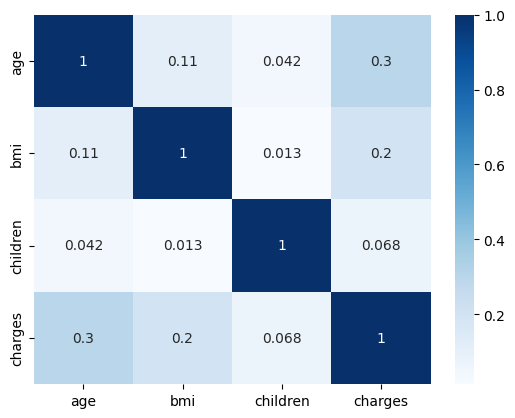

In [10]:
# evaluate the relationship variables with heatmap
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), cmap='Blues', annot=True)
plt.show()

Age and BMI have strong correlation with chagers.

In [11]:
# one-hot encoding to convert categorical variables
region=pd.get_dummies(df.region, prefix='location')
df = pd.concat([df,region],axis=1)
df.drop(columns='region', inplace=True)

df.sex.replace(to_replace=['male','female'],value=[1,0], inplace=True)
df.smoker.replace(to_replace=['yes', 'no'], value=[1,0], inplace=True)

In [12]:
# feature selection
y=df.charges.values
X=df[['age', 'bmi', 'smoker', 'children', 'location_northeast', 'location_northwest', 'location_southeast', 'location_southwest']]
print(X.shape)
print(y.shape)

(1338, 8)
(1338,)


In [15]:
# create model
reg = LinearRegression()

# split data into train, validation, and test set
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (802, 8)
the shape of the training set (target) is: (802,)

the shape of the test set (input) is: (536, 8)
the shape of the test set (target) is: (536,)


In [16]:
# fit model to the training data
reg = reg.fit(x_train,y_train)
print(reg)

LinearRegression()


In [17]:
# apply the model to the test set
y_pred = reg.predict(x_test)
print(y_pred)

[ 4.09649809e+03  1.30034082e+04  1.22826332e+04  1.35684946e+04
  2.64358476e+02  3.21511990e+04  1.33389853e+04  1.24657002e+04
  3.94399427e+03  2.94292995e+04  1.12827063e+04  1.70640717e+04
  9.08324076e+03  7.92369872e+03  3.12566989e+03  1.03925260e+04
  3.88784245e+03  6.65744479e+03  1.52013591e+04  1.40479644e+04
  1.28298287e+04  3.29508030e+04  8.90209015e+03  8.81935370e+03
  2.79959435e+03  8.27315158e+03  1.01194218e+04  1.07875428e+04
  7.22242791e+03  4.56879287e+03  1.37471145e+04  5.67563028e+03
  3.50312214e+04  2.66920369e+04  3.36935483e+04  9.71755717e+03
  2.98652591e+04  2.65145137e+04  1.52123390e+04  3.36873441e+04
  6.35277816e+03  1.41460692e+04  1.11303335e+04  1.49466888e+04
  3.83058588e+03  1.35323637e+04  4.42947628e+03  2.86522028e+04
  7.25703623e+03  1.47907336e+04  1.37132338e+04  1.21055037e+04
  1.77984794e+03  8.70937015e+03  2.61579236e+04  9.86811210e+03
  3.44226495e+04  1.40986294e+04  3.32251778e+03  5.76287615e+03
  6.39709788e+03  1.53174

In [21]:
# evaluate the model
print("Training Model:", reg.score(x_train,y_train))
print("Testing Model:", reg.score(x_test,y_test))
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)*100
print("The accuracy of the model is %.2f" %accuracy)

Training Model: 0.7582174599023154
Testing Model: 0.738035013329308
The accuracy of the model is 73.80
